In [8]:
import sys
sys.path.append("..")
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from dory.linear.ols import OrdinaryLeastSquares
from dory.scaler.standard import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
artificial_df = pd.read_csv("artificial1d.csv", header=None)
artificial_df.describe()

,0,1
count,3.000000e+01,30.000000
mean,-2.960595e-17,0.067618
std,6.071316e-01,1.065356
min,-1.000000e+00,-2.082017
25%,-5.000000e-01,-0.870920
50%,0.000000e+00,0.098189
75%,5.000000e-01,0.957162
max,1.000000e+00,2.309838


In [4]:
X = artificial_df.iloc[:, :-1]
y = artificial_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24, 1) (6, 1) (24,) (6,)


In [5]:
ols_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear", OrdinaryLeastSquares())
])
ols_pipeline

,steps,"[('scaler', ...), ('linear', ...)]"
,transform_input,None
,memory,None
,verbose,False
,fit_intercept,True


/var/folders/bj/s5pcvzbn6kxbfc_lky95q7400000gn/T/ipykernel_45238/700707941.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


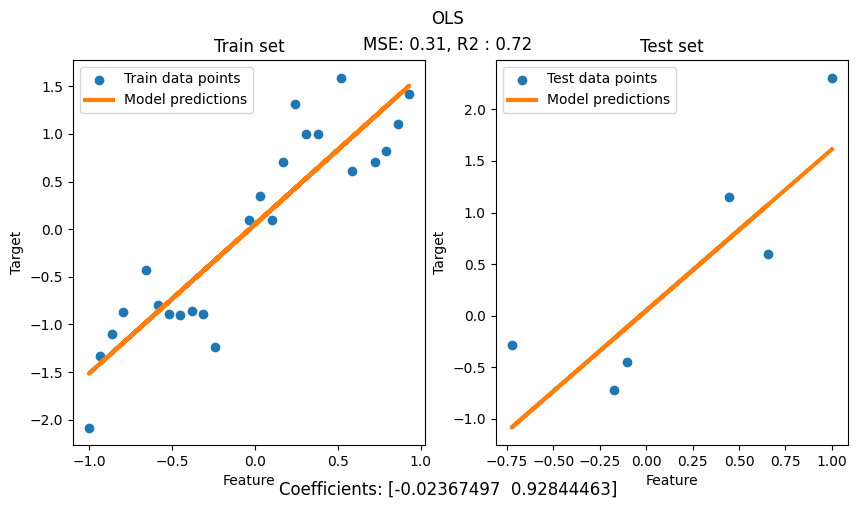

In [ ]:
# TODO: Check if this y_pred is normalized and denormalized if needed
y_pred = ols_pipeline.fit(X_train, y_train).predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    ols_pipeline.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("OLS")
fig.text(0.5, 0.9, f'MSE: {mse:.2f}, R2 : {r2:.2f}',fontsize=12, horizontalalignment='center')
fig.text(0.5, 0.01, f'Coefficients: {ols_pipeline["linear"].w_}',fontsize=12, horizontalalignment='center')


fig.show()

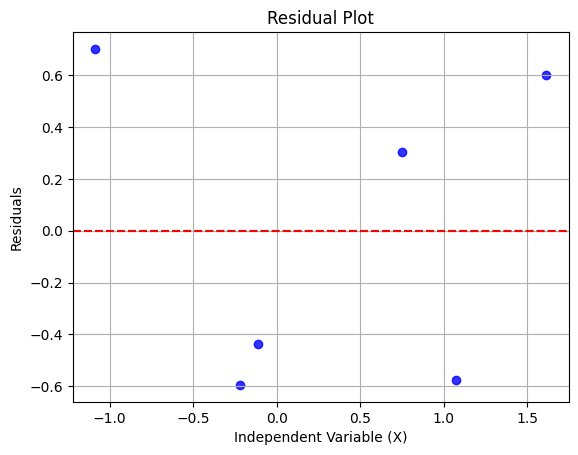

In [ ]:
sns.residplot(x=y_pred, y=y_test, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()